# [LAB-13] 1. 시계열 데이터의 이해

1. 🕓시계열 분석📊
- 원래는 머신러닝에서 배우는 분석임
- 주요 분석 기법: ARIMA, Prohet
- 시계열분석은 그 자체만으로는 분석결과만 놓고 논하기에는 위험함
  - 외부 요인의 영향을 많이 받기 때문
  - 독립적으로는 증거로서의 효력이 약함
  - 약간.. supplimentary support 하는 느낌 기존 데이터들을
- 시간차를 두고 예측결과가 일어나기도 함
- 시계열분석에서는 추세는 보지 않는다? (추세선 제거)

2. 🕓시계열 데이터📉
- 시간의 흐름에 따라 관찰된 값들
  - 미래의 값을 예측하고 경향, 주기성(계절성) 등을 파악하는 데 사용함
- x-axis data type: datetime
  - if object -> 타입변환 필요
- y-axis: 수치형 데이터 (int, float)

## #01. 시계열 분석의 가정

### 1. 정상성(Stationary)

- `평균`과 `분산`이 `일정`하고 `공분산도 시차에만 의존`하고 특정 시점에는 의존하지 않는 상태

| **종류** | **설명** |
| -------- | -------- |
| `비정상성` 시계열 자료 | 시계열 분석 실시 시 다루기 어려운 자료. `대부분의 시계열 자료` 형태 |
| `정상성` 시계열 자료 | 비정상 시계열 데이터를 `전처리 (평균, 분산 일정화)`해서 변환한 다루기 쉬운 자료 |

- 시계열 분석의 거의 대부분의 데이터(Time Series)가 **비정상성(Non-stationary)**임
  - **(거의) 무조건** `전처리(정상화)` 과정으로 데이터를 정상성 자료로 `변환`필요
    - 시계열 분석에서는 날짜/시간 값이 `인덱스로 존재`해야 함
      - `.set_index('')` <- 파이썬 종특
    - `전처리` 방법:
      - 평균: **`차분(Difference)`** 무한반복 돌리기
        - 목적: 직전데이터와 직후데이터 간 `평균` 일정화 (Constant Mean)
        - $$\Delta y_t = y_t - y_{t-1}$$
      - 분산: **`변환(Transformation)`**
        - 목적: `변동폭` 일정화 (Constant Variance)
        - ex. 로그변환
    - 약한 의미의 정상성 (약정상성):
      - 모든 시점에 대해 평균 일정, 시점과 분산 독립, 공분산은 시차에만 의존

- 시계열 데이터의 정상성 충족조건: 
  - 1. 평균 일정 (constant mean)
    - 확인 by: 
      - 1. 시각화 (lineplot)
      - 2. **ADF test**
        - ADF 테스트의 가설:
      
      | **가설** | **내용** |
      | -------- | -------- |
      | 귀무가설 | 데이터가 비정상성이다 |
      | 대립가설 | 데이터가 비정상성이 아니다 (=정상성이다) |
      
    - done by:
      - 차분: $$\Delta y_t = y_t - y_{t-1}$$
    - if ADF 테스트 결과 `평균 일정` 충족 안함 시: 
      -  [`차분` → (`시각화` 생략가능) → `ADF test`] 무한반복 돌리기 (평균 일정하게 될 때까지)
  - 2. 분산 일정 (constant variance)

## #02. 준비작업

### 1. 패키지 가져오기:

In [1]:
# 기본 참조:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

# Time Series의 Stationary 확인을 위한 ADF Test 참조:
from statsmodels.tsa.stattools import adfuller

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

In [3]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (144, 2)
열 갯수: 2
행 갯수: 144

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


### 4. 데이터 전처리:

시계열 분석에서는 날짜/시간 값이 인덱스로 존재해야 함

In [4]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## #03. 정상성(조건 1: Stationarity of constant mean) 확인

### 1. 시각화:

시계열 데이터의 파형이 평행하게 진행되야 한다

(Wave of the time-series data should be progressed horizontally in time)

x-axis: time-series data / y-axis: 연속성 데이터

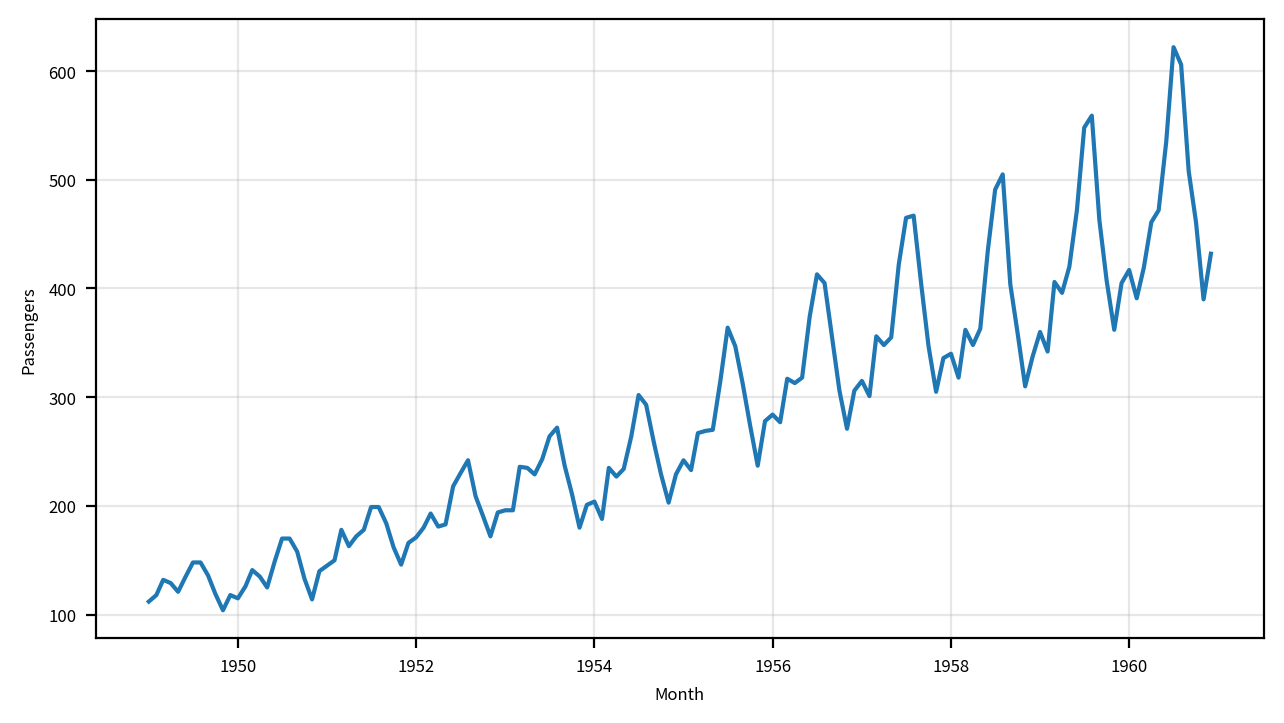

In [5]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기 (w/ seaborn 사용)
sb.lineplot(data = df1, x = df1.index, y = 'Passengers')

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 2. ADF test:

평균 일정 여부(Stationarity of constant mean) 판단검정법

In [12]:
ar = adfuller(df1['Passengers'])
#ar

print("검정통계량(ADF Statistic): %f" % ar[0])
print("유의수준(p-value): %f" % ar[1])
print("최적 필요 차분 수(num of lags): %f" % ar[2])
print("관측치 갯수(num of observations): %f" % ar[3])
print("기각값(Critical values):")
for key, value in ar[4].items():
    print("\t%s: %.3f" % (key, value))

print("데이터 정상성(조건1: constant mean) 충족여부:", "충족" if ar[1] <= 0.05 else "충족 X")

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적 필요 차분 수(num of lags): 13.000000
관측치 갯수(num of observations): 130.000000
기각값(Critical values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성(조건1: constant mean) 충족여부: 충족 X


## #04. 차분(Difference)

각각의 관측값과 직전 관측값 사이의 차이

시계열분석에서 정상성 확보를 위해 가장 많이 사용함

수식: $$\Delta t = y_t - y_{t-1}$$

### 1. 1차 차분

#### (1) 첫 번째 데이터는 직전 데이터가 없으니 결측치로 나옴 => 제거 필요

In [9]:
df2 = df1.diff().dropna()
df2

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


#### (2) 정상성 충족여부 확인: 시각화 + ADF test

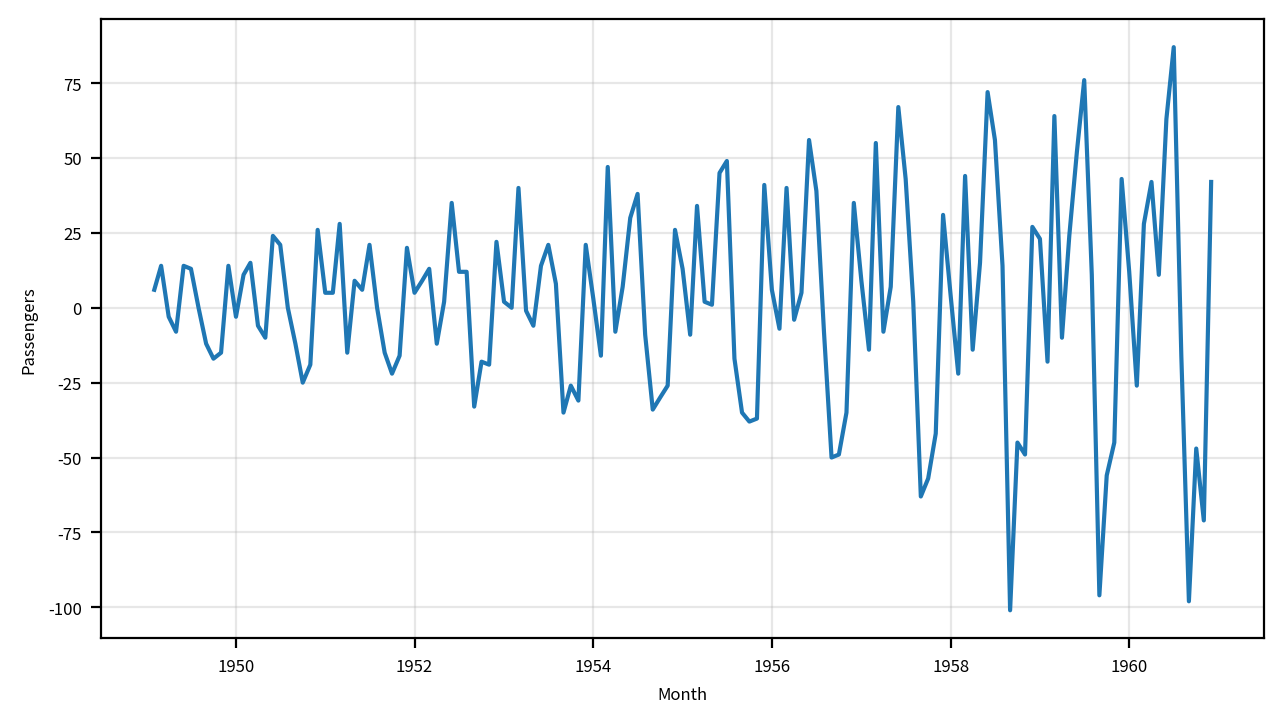

검정통계량(ADF Statistic): -2.829267
유의수준(p-value): 0.054213
최적 필요 차분 수(num of lags): 12.000000
관측치 갯수(num of observations): 130.000000
기각값(Critical values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성(조건1: constant mean) 충족여부: 충족 X


In [13]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기 (w/ seaborn 사용)
sb.lineplot(data = df2, x = df2.index, y = 'Passengers')

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

ar = adfuller(df2['Passengers'])

print("검정통계량(ADF Statistic): %f" % ar[0])
print("유의수준(p-value): %f" % ar[1])
print("최적 필요 차분 수(num of lags): %f" % ar[2])
print("관측치 갯수(num of observations): %f" % ar[3])
print("기각값(Critical values):")
for key, value in ar[4].items():
    print("\t%s: %.3f" % (key, value))

print("데이터 정상성(조건1: constant mean) 충족여부:", "충족" if ar[1] <= 0.05 else "충족 X")

### 2. 2차차분

정상성 충족 될 때까지 차분 무한반복

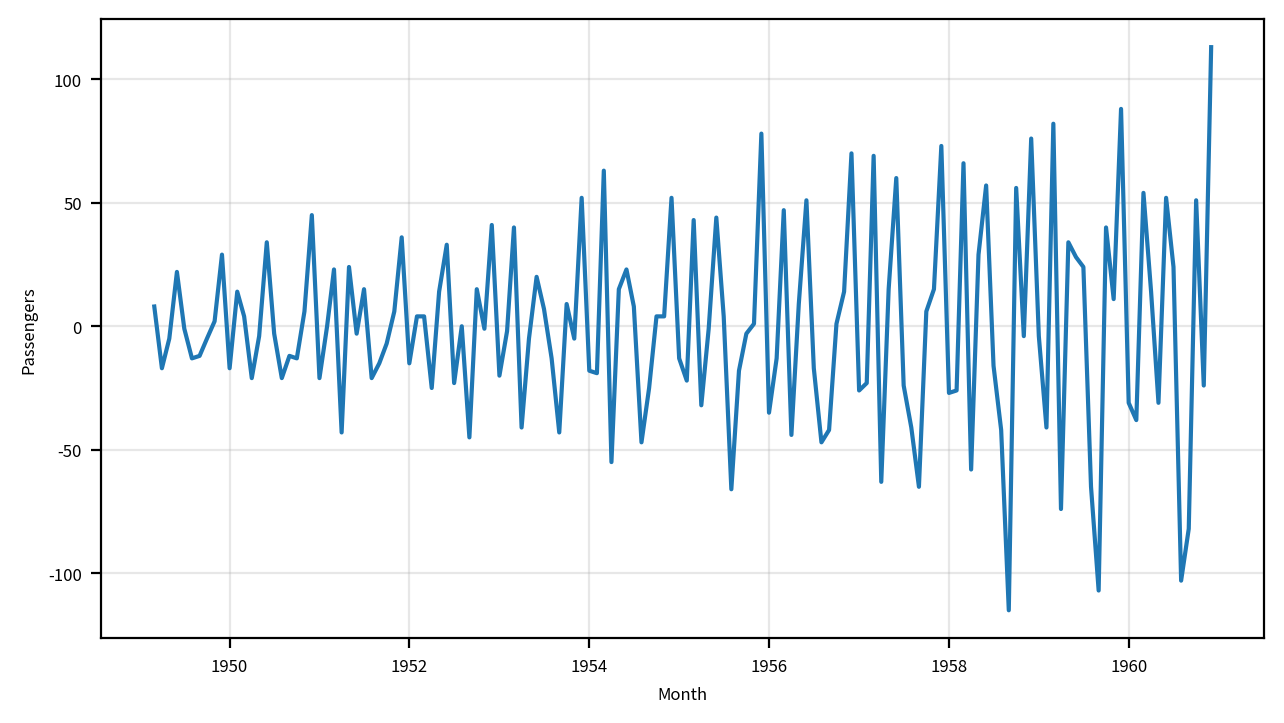

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적 필요 차분 수(num of lags): 11.000000
관측치 갯수(num of observations): 130.000000
기각값(Critical values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성(조건1: constant mean) 충족여부: 충족


In [14]:
df3 = df2.diff().dropna()

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기 (w/ seaborn 사용)
sb.lineplot(data = df3, x = df3.index, y = 'Passengers')

# 3) 그래프 꾸미기: 
ax.grid(True, alpha=0.3)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

ar = adfuller(df3['Passengers'])

print("검정통계량(ADF Statistic): %f" % ar[0])
print("유의수준(p-value): %f" % ar[1])
print("최적 필요 차분 수(num of lags): %f" % ar[2])
print("관측치 갯수(num of observations): %f" % ar[3])
print("기각값(Critical values):")
for key, value in ar[4].items():
    print("\t%s: %.3f" % (key, value))

print("데이터 정상성(조건1: constant mean) 충족여부:", "충족" if ar[1] <= 0.05 else "충족 X")

> constant mean(평균 일정) 해줬으니 차분은 여기서 stop.